In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import time

#%matplotlib notebook

sns.set_style('darkgrid')

In [8]:
easy = pd.read_csv('Easy.csv')
medium = pd.read_csv('Medium.csv')
hard = pd.read_csv('Hard.csv')

easy['Difficulty'] = 'Easy'
medium['Difficulty'] = 'Medium'
hard['Difficulty'] = 'Hard'

df = easy.append(medium).append(hard)

<Figure size 504x432 with 0 Axes>

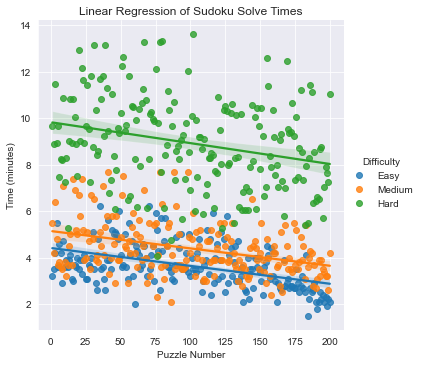

In [58]:
plt.figure(figsize=(7,6))
ax = sns.lmplot(x="Puzzle", y="Time", hue="Difficulty",data=df)

ax.set(xlabel='Puzzle Number', ylabel='Time (minutes)')

plt.title('Linear Regression of Sudoku Solve Times')

plt.savefig("Regressions.png", format='png',dpi=300, bbox_inches='tight')
plt.show()

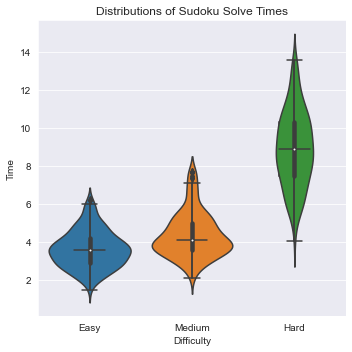

In [53]:
plt.figure(figsize=(5,5), tight_layout=True)
ax = sns.violinplot(x=df.Difficulty, y=df.Time)

ax.set(xlabel='Puzzle Number', ylabel='Time (minutes)')

sns.boxplot(x='Difficulty', y='Time', data=df, width=0.3,boxprops={'zorder': 0.7}, ax=ax)

plt.title('Distributions of Sudoku Solve Times')

plt.savefig("vln.png",
                    format='png',dpi=300)
plt.show()

In [37]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

In [46]:
def live_plot(data_dict, figsize=(6,5), title='Live Plot of Sudoku Solve Times'):
    clear_output(wait=0.01)
    plt.figure(figsize=figsize, dpi=300)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Puzzle')
#    plt.legend(loc='left') # the plot evolves to the right
    plt.legend(loc=(1.04,0))
    
    plt.show()

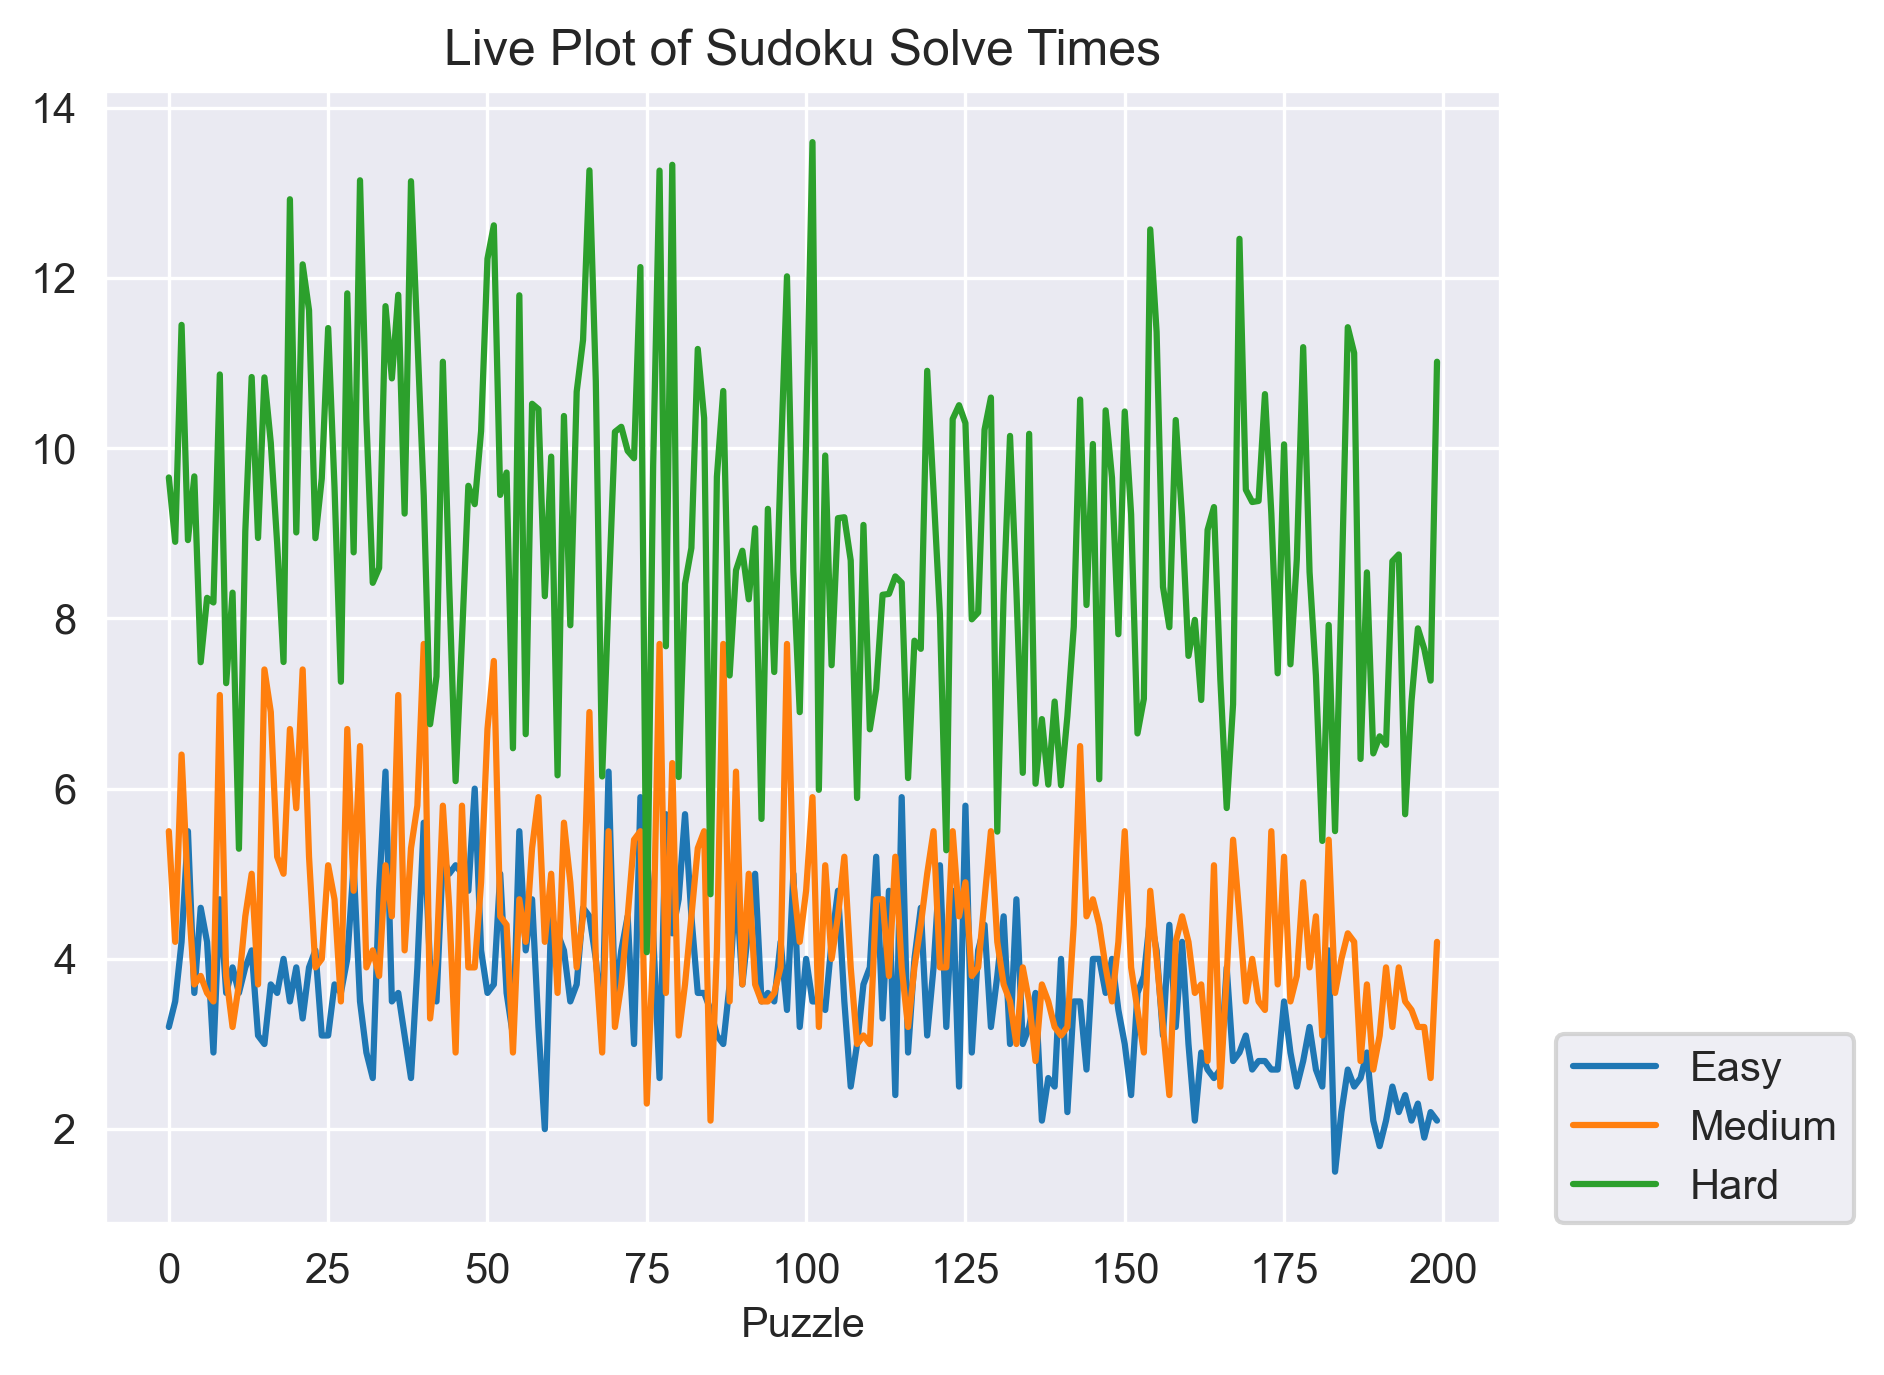

In [51]:
data = collections.defaultdict(list)
for i in range(200):
    data['Easy'].append(easy.Time[i])
    data['Medium'].append(medium.Time[i])
    data['Hard'].append(hard.Time[i])
    live_plot(data)

<IPython.core.display.Javascript object>


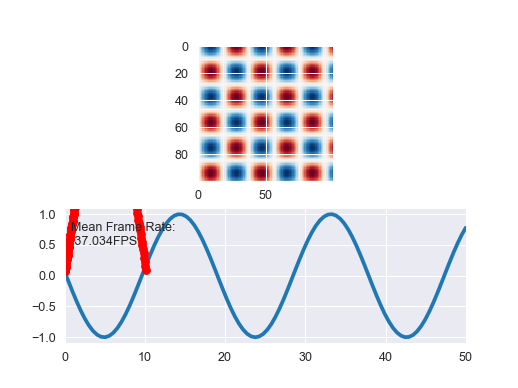

C:\Users\gabri\AppData\Local\Temp/ipykernel_10792/1256452705.py:34: RuntimeWarning: divide by zero encountered in true_divide
  tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= ((i+1) / (time.time() - t_start)) )


In [125]:
def live_update_demo(blit = False):
    x = np.linspace(0,50., num=100)
    X,Y = np.meshgrid(x,x)
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    img = ax1.imshow(X, vmin=-1, vmax=1, interpolation="None", cmap="RdBu")


    line, = ax2.plot([], lw=3)
    text = ax2.text(0.8,0.5, "")

    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim([-1.1, 1.1])

    fig.canvas.draw()   # note that the first draw comes before setting data 


    if blit:
        # cache the background
        axbackground = fig.canvas.copy_from_bbox(ax1.bbox)
        ax2background = fig.canvas.copy_from_bbox(ax2.bbox)

    plt.show(block=False)


    t_start = time.time()
    k=0.

    for i in np.arange(1000):
        img.set_data(np.sin(X/3.+k)*np.cos(Y/3.+k))
        line.set_data(x, np.sin(x/3.+k))
        tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= ((i+1) / (time.time() - t_start)) ) 
        text.set_text(tx)
        #print tx
        k+=0.11
        if blit:
            # restore background
            fig.canvas.restore_region(axbackground)
            fig.canvas.restore_region(ax2background)

            # redraw just the points
            ax1.draw_artist(img)
            ax2.draw_artist(line)
            ax2.draw_artist(text)

            # fill in the axes rectangle
            fig.canvas.blit(ax1.bbox)
            fig.canvas.blit(ax2.bbox)

            # in this post http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
            # it is mentionned that blit causes strong memory leakage. 
            # however, I did not observe that.

        else:
            # redraw everything
            fig.canvas.draw()

        fig.canvas.flush_events()
        #alternatively you could use
        #plt.pause(0.000000000001) 
        # however plt.pause calls canvas.draw(), as can be read here:
        #http://bastibe.de/2013-05-30-speeding-up-matplotlib.html


live_update_demo(True)   # 175 fps